In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('../Datasets/UNSW_NB15_testing-set.csv')
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


In [184]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [187]:
df.drop(columns=['id', 'proto', 'service', 'state', 'attack_cat'], inplace=True)
df.head(10)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.000011,2,0,496,0,90909.09020,254,0,1.803636e+08,0.0,...,1,1,2,0,0,0,1,2,0,0
1,0.000008,2,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,...,1,1,2,0,0,0,1,2,0,0
2,0.000005,2,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,...,1,1,3,0,0,0,1,3,0,0
3,0.000006,2,0,900,0,166666.66080,254,0,6.000000e+08,0.0,...,2,1,3,0,0,0,2,3,0,0
4,0.000010,2,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,...,2,1,3,0,0,0,2,3,0,0
5,0.000003,2,0,784,0,333333.32150,254,0,1.045333e+09,0.0,...,2,1,2,0,0,0,2,2,0,0
6,0.000006,2,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,...,2,1,2,0,0,0,2,2,0,0
7,0.000028,2,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,...,1,1,3,0,0,0,1,3,0,0
8,0.000000,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,...,2,2,2,0,0,0,2,2,1,0
9,0.000000,1,0,46,0,0.00000,0,0,0.000000e+00,0.0,...,2,2,2,0,0,0,2,2,1,0


In [188]:
X = df.drop(columns=['label'])
y = df['label']

In [189]:
X.shape[1]

39

In [190]:
score = 1/X.shape[1]
score

0.02564102564102564

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [192]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=0, 
                             criterion='gini') # Use gini criterion to define feature importance

# Create a SelectFromModel object 
sfm = SelectFromModel(estimator=rfc, # Use random forest classifier to identify features
                      threshold=0.02) # that have an importance of more than 0.02

# Train the selector
sfm = sfm.fit(X_train, y_train)

# Print the names of the most important features
print('The most important features based on random forest classifier:')
for feature_list_index in sfm.get_support(indices=True):
    print('- ' + df.columns[feature_list_index])

The most important features based on random forest classifier:
- dur
- dpkts
- sbytes
- dbytes
- rate
- sttl
- dttl
- sload
- dload
- sinpkt
- dinpkt
- tcprtt
- synack
- smean
- dmean
- ct_srv_src
- ct_state_ttl
- ct_dst_sport_ltm
- ct_dst_src_ltm
- ct_srv_dst


In [193]:
select_feature = ['dur', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload',
                 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'smean', 'dmean', 'ct_srv_src', 
                 'ct_state_ttl', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_srv_dst', 'label']

select_df = df[select_feature]

In [194]:
select_df.head(10)

,dur,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sinpkt,...,tcprtt,synack,smean,dmean,ct_srv_src,ct_state_ttl,ct_dst_sport_ltm,ct_dst_src_ltm,ct_srv_dst,label
0,0.000011,0,496,0,90909.09020,254,0,1.803636e+08,0.0,0.011,...,0.0,0.0,248,0,2,2,1,2,2,0
1,0.000008,0,1762,0,125000.00030,254,0,8.810000e+08,0.0,0.008,...,0.0,0.0,881,0,2,2,1,2,2,0
2,0.000005,0,1068,0,200000.00510,254,0,8.544000e+08,0.0,0.005,...,0.0,0.0,534,0,3,2,1,3,3,0
3,0.000006,0,900,0,166666.66080,254,0,6.000000e+08,0.0,0.006,...,0.0,0.0,450,0,3,2,1,3,3,0
4,0.000010,0,2126,0,100000.00250,254,0,8.504000e+08,0.0,0.010,...,0.0,0.0,1063,0,3,2,1,3,3,0
5,0.000003,0,784,0,333333.32150,254,0,1.045333e+09,0.0,0.003,...,0.0,0.0,392,0,2,2,1,2,2,0
6,0.000006,0,1960,0,166666.66080,254,0,1.306667e+09,0.0,0.006,...,0.0,0.0,980,0,2,2,1,2,2,0
7,0.000028,0,1384,0,35714.28522,254,0,1.977143e+08,0.0,0.028,...,0.0,0.0,692,0,3,2,1,3,3,0
8,0.000000,0,46,0,0.00000,0,0,0.000000e+00,0.0,60000.688,...,0.0,0.0,46,0,2,2,2,2,2,0
9,0.000000,0,46,0,0.00000,0,0,0.000000e+00,0.0,60000.712,...,0.0,0.0,46,0,2,2,2,2,2,0


In [211]:
select_df.to_csv('../Datasets/selected_data.csv', index=False)

In [196]:
Xs = select_df.drop(columns=['label'])
ys = select_df['label']

In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)

In [198]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.25, random_state=42)

In [199]:
classify_type = "binary"

In [200]:
grid_params = { 'n_neighbors' : [1, 5, 7, 9, 11, 13, 15, 20],
               'weights' : ['uniform', 'distance'],
               'metric' : ['minkowski', 'euclidean', 'manhattan']}

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [202]:
gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params, cv=3, n_jobs = -1)

In [203]:
g_res_knn = gs_knn.fit(Xs_train, ys_train)

In [204]:
g_res_knn.best_score_

0.9541369090997426

In [205]:
g_res_knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [206]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='manhattan')
knn.fit(Xs_train, ys_train)
y_knn_train_predict = knn.predict(Xs_train)
y_knn_test_predict = knn.predict(Xs_test)

In [207]:
print("KNN train Accuracy:", accuracy_score(y_train, y_knn_train_predict))
print("KNN test Accuracy:", accuracy_score(y_test, y_knn_test_predict))

KNN train Accuracy: 0.9995627459554001
KNN test Accuracy: 0.9581207792838751


In [208]:
print(classification_report(y_test, y_knn_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      9251
           1       0.97      0.95      0.96     11332

    accuracy                           0.96     20583
   macro avg       0.96      0.96      0.96     20583
weighted avg       0.96      0.96      0.96     20583



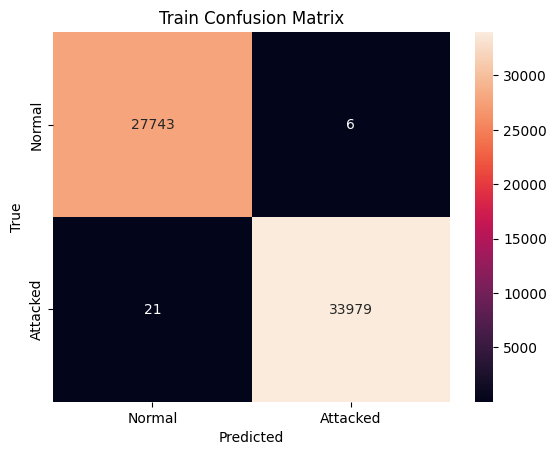

In [209]:
display_labels = {"binary":["Normal","Attacked"],"multiclass":["Normal","Generic","Exploits","Fuzzers","DoS","Reconnaissance","Analysis", "Backdoor", "Shellcode", "Worms"]}
matrix_train = sns.heatmap(confusion_matrix(y_train, y_knn_train_predict), annot = True, fmt = 'd', xticklabels = display_labels[classify_type], yticklabels = display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Train Confusion Matrix")
#plt.savefig('../images/knn_train_confusion_matrix_'  + classify_type + ".png", bbox_inches='tight')
plt.show()

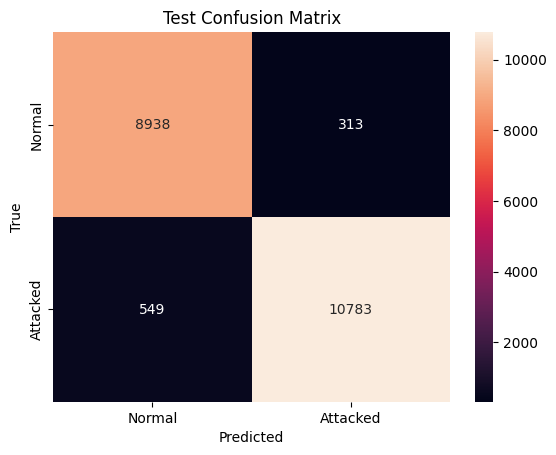

In [210]:
matrix_test = sns.heatmap(confusion_matrix(y_test, y_knn_test_predict),annot=True, fmt='d',xticklabels=display_labels[classify_type], yticklabels=display_labels[classify_type])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Test Confusion Matrix")
#plt.savefig('../images/knn_test_confusion_matrix_' + classify_type + ".png", bbox_inches='tight')
plt.show()